<a href="https://colab.research.google.com/github/rdkdaniel/Chinook-DB-Analysis/blob/main/Analysis_Chinook_i_e_Just_View_the_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ImportLibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sqlite3
import sqlalchemy 

In [2]:
%matplotlib inline

In [ ]:


#Import Data
#Data from Kaggle



In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [6]:
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [7]:
#Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
#Downloading dataset
! kaggle datasets download alaasedeeq/chinook

  0% 0.00/373k [00:00<?, ?B/s]
100% 373k/373k [00:00<00:00, 102MB/s]


**Unzip data**

In [9]:
!unzip chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [10]:
# creating file path
dbfile = 'chinook.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
con.close()

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


In [ ]:
#Better visualize the DB??

**Various Functions**

In [11]:
db = 'chinook.db'

def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q,conn)

In [12]:
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c) 

In [18]:
def show_tables():
    q = '''
        SELECT
            name,
            type
        FROM sqlite_master
        WHERE type IN ("table","view");
        '''
    return run_query(q)

show_tables()

,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


In [22]:
# Connecting to sqlite
conn = sqlite3.connect('chinook.db')  #SO, YOU MUST SPECIFY THE DB IN FULL NOT (db) ONLY BECAUSE IT WAS DECLARED ABOVE
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in InvoiceLine table:')
data=cursor.execute('''SELECT * FROM InvoiceLine''')
for column in data.description:
    print(column[0])
      
# Display data
print('\nData in InvoiceLine table:')
data=cursor.execute('''SELECT * FROM InvoiceLine''')
for row in data:
    print(row)
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in InvoiceLine table:
InvoiceLineId
InvoiceId
TrackId
UnitPrice
Quantity

Data in InvoiceLine table:
(1, 1, 2, 0.99, 1)
(2, 1, 4, 0.99, 1)
(3, 2, 6, 0.99, 1)
(4, 2, 8, 0.99, 1)
(5, 2, 10, 0.99, 1)
(6, 2, 12, 0.99, 1)
(7, 3, 16, 0.99, 1)
(8, 3, 20, 0.99, 1)
(9, 3, 24, 0.99, 1)
(10, 3, 28, 0.99, 1)
(11, 3, 32, 0.99, 1)
(12, 3, 36, 0.99, 1)
(13, 4, 42, 0.99, 1)
(14, 4, 48, 0.99, 1)
(15, 4, 54, 0.99, 1)
(16, 4, 60, 0.99, 1)
(17, 4, 66, 0.99, 1)
(18, 4, 72, 0.99, 1)
(19, 4, 78, 0.99, 1)
(20, 4, 84, 0.99, 1)
(21, 4, 90, 0.99, 1)
(22, 5, 99, 0.99, 1)
(23, 5, 108, 0.99, 1)
(24, 5, 117, 0.99, 1)
(25, 5, 126, 0.99, 1)
(26, 5, 135, 0.99, 1)
(27, 5, 144, 0.99, 1)
(28, 5, 153, 0.99, 1)
(29, 5, 162, 0.99, 1)
(30, 5, 171, 0.99, 1)
(31, 5, 180, 0.99, 1)
(32, 5, 189, 0.99, 1)
(33, 5, 198, 0.99, 1)
(34, 5, 207, 0.99, 1)
(35, 5, 216, 0.99, 1)
(36, 6, 230, 0.99, 1)
(37, 7, 231, 0.99, 1)
(38, 7, 232, 0.99, 1)
(39, 8, 234, 0.99, 1)
(40, 8, 236, 0.99, 1)
(41, 9, 238, 0.99, 1)
(42, 9, 240, 0.99, 1)
(

**What we needed is here!!**

Columns in InvoiceLine table:

InvoiceLineId

InvoiceId

TrackId

UnitPrice

Quantity

In [24]:
# Connecting to sqlite
conn = sqlite3.connect('chinook.db')  #SO, YOU MUST SPECIFY THE DB IN FULL NOT (db) ONLY BECAUSE IT WAS DECLARED ABOVE
  
# Creating a cursor object using the cursor() method
cursor = conn.cursor()
  
  
# Display columns
print('\nColumns in Customer table:')
data=cursor.execute('''SELECT * FROM Customer''')
for column in data.description:
    print(column[0])
      
# Display data
print('\nData in Customer table:')
data=cursor.execute('''SELECT * FROM Customer''')
for row in data:
    print(row)
      
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()


Columns in Customer table:
CustomerId
FirstName
LastName
Company
Address
City
State
Country
PostalCode
Phone
Fax
Email
SupportRepId

Data in Customer table:
(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3)
(2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5)
(3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3)
(4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4)
(5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.co

**What we needed on table called Customers is here!!!**

**Columns in Customer table:**

CustomerId

FirstName

LastName

Company

Address

City

State

Country

PostalCode

Phone

Fax

Email

SupportRepId

**Selecting Albums to Purchase**

[Borrowed content]


The Chinook record store has just signed a deal with a new record label, and we've been tasked with selecting the first three albums that will be added to the store, from a list of four.

All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:
Artist Name 	Genre


Regal 	Hip-Hop

Red Tone 	Punk

Meteor and the Girls 	Pop

Slim Jim Bites 	Blues

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.


In [27]:
albums_to_purchase = '''
WITH 
    usa_tracks_sold AS
        (
         SELECT il.* FROM InvoiceLine il
         INNER JOIN invoice i ON il.InvoiceId = i.InvoiceId
         INNER JOIN customer c ON i.CustomerId = c.CustomerId
         WHERE c.country = "USA" 
        )
SELECT 
    g.name Genre, 
    COUNT(uts.InvoiceLineId) "Number of Tracks Sold", 
    CAST(COUNT(uts.InvoiceLineId) AS FLOAT)/(SELECT COUNT(*) FROM usa_tracks_sold) "Percentage of Tracks Sold"
FROM usa_tracks_sold uts
INNER JOIN track t ON uts.TrackId = t.TrackId
INNER JOIN genre g ON t.GenreId = g.GenreId
GROUP BY 1 
ORDER BY 2 DESC
LIMIT 10;
'''

run_query(albums_to_purchase)

,Genre,Number of Tracks Sold,Percentage of Tracks Sold
0,Rock,157,0.317814
1,Latin,91,0.184211
2,Metal,64,0.129555
3,Alternative & Punk,50,0.101215
4,Jazz,22,0.044534
5,Blues,15,0.030364
6,TV Shows,14,0.028340
7,R&B/Soul,12,0.024291
8,Classical,8,0.016194
9,Comedy,8,0.016194


In [ ]:
#Just view the table InvoiceLine and adjust accordingly.
#Our current InvoiceLine table lacks the colum Il.invoice_id
#ALL THE ISSUES CAME FROM THE DB I DOWNLOADED.. THE NAMING CONVENTION WAS DIFFERENT THAN THE CODE I HAD.
#RECTIFYING THAT FIXED EVERYTHING

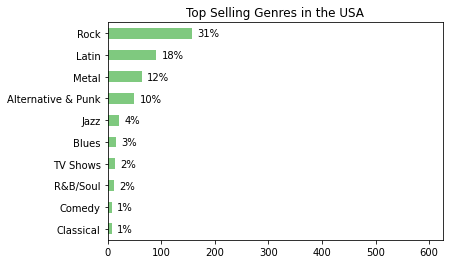

In [28]:
genre_sales_usa = run_query(albums_to_purchase)
genre_sales_usa.set_index('Genre', drop=True, inplace=True)
genre_sales_usa.sort_values('Number of Tracks Sold', inplace=True)
genre_sales_usa['Number of Tracks Sold'].plot.barh(
        title="Top Selling Genres in the USA",
        xlim=(0, 625),
        colormap=plt.cm.Accent
)

plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "Number of Tracks Sold"]
    label = (genre_sales_usa.loc[label, "Percentage of Tracks Sold"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()



**Employee Sales Performance**

In [ ]:
employee_sales_performance = '''
WITH 
    customer_support_rep_sales AS
        (
         SELECT 
             i.customer_id,
             c.support_rep_id,
             SUM(i.total) Sales_Total
         FROM invoice i
         INNER JOIN customer c ON c.customer_id = i.customer_id
         GROUP BY 2
        )
SELECT
    e.first_name || " " || e.last_name "Employee Name",
    e.hire_date "Hire Date",
    SUM(csrs.Sales_total) "Amount of Sales (in $)"
FROM customer_support_rep_sales csrs
INNER JOIN employee e ON csrs.support_rep_id = e.employee_id
GROUP BY 1;
'''

run_query(employee_sales_performance)

https://github.com/arjunchndr/Analyzing-Chinook-Database-using-SQL-and-Python/blob/master/Analyzing%20Chinook%20Database%20using%20SQL%20and%20Python.ipynb